# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Init

In [3]:
import datahandler

import matplotlib.pyplot as plt


dataset_id = "oslo"

data_preprocessor = datahandler.DataPreprocessorOUS(dataset_id)
data_preprocessor.execute()

data_loader = datahandler.DataLoader(dataset_id)
data_loader.execute()


Loading dataset: 100%|██████████| 6/6 [00:12<00:00,  2.03s/it]


# Analysis
- All of the rows where "time_available" is NaN should be dropped (64 rows)
- All of the rows where "time_dispatch" is NaN should be dropped (111 rows)
- All of the rows where "triage_impression_during_call" is NaN should be dropped (9 rows)
- All of the rows where "time_arrival_scene" is NaN and "time_arrival_hospital" is not NaN should be dropped (13695 rows)
- All of the rows where "time_departure_scene" is NaN and "time_arrival_hospital" is not NaN should be dropped (8356 rows)


In [4]:
nan_rows = data_loader.processed_incidents_df[data_loader.processed_incidents_df["time_available"].isna()]
print(nan_rows.shape[0])


64


In [5]:
nan_rows = data_loader.processed_incidents_df[data_loader.processed_incidents_df["time_dispatch"].isna()]
print(nan_rows.shape[0])

23104


In [6]:
nan_rows = data_loader.processed_incidents_df[data_loader.processed_incidents_df["triage_impression_during_call"].isna()]
print(nan_rows.shape[0])

9


In [7]:
count = data_loader.processed_incidents_df[(data_loader.processed_incidents_df["time_arrival_scene"].isna()) & (~data_loader.processed_incidents_df["time_arrival_hospital"].isna())].shape[0]
print(count)

13695


In [8]:
count = data_loader.processed_incidents_df[(data_loader.processed_incidents_df["time_departure_scene"].isna()) & (~data_loader.processed_incidents_df["time_arrival_hospital"].isna())].shape[0]
print(count)

8356


In [9]:
print(data_loader.enhanced_incidents_df.shape)

(711924, 19)


In [10]:
print(data_loader.enhanced_incidents_df["response_time_sec"])

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
711919    1125.0
711920    1773.0
711921    1449.0
711922    5527.0
711923    2357.0
Name: response_time_sec, Length: 711924, dtype: float64


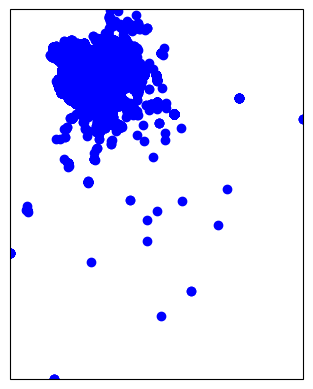

In [12]:
import folium

# Sample data for demonstration; replace this with your actual DataFrame
sample_data = {
    'longitude': [10.75, 10.76, 10.77],
    'latitude': [59.91, 59.92, 59.93]
}

df_sample = df

# Create a map object centered around the mean latitude and longitude
m = folium.Map(location=[df_sample['latitude'].mean(), df_sample['longitude'].mean()], zoom_start=13)

# Add points to the map
for _, row in df_sample.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        color='blue',
                        fill=True,
                        fill_opacity=0.7).add_to(m)

# Display the map
m
